###**CSCE 5063-001: Assignment 1**




            Quan Mai




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data Loader

from google.colab import drive
drive.mount('/content/drive') 

import itertools
with open('/content/drive/My Drive/UoA/ML/lab1/data.txt') as f:
  data = np.genfromtxt(itertools.islice(f, 19, None), dtype=float) 
X = np.array(data[:, 1:16])
y = np.array(data[:, 16], ndmin=2).T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The number of features n, the number of traning dataset m
m, n = X.shape[0], X.shape[1]
m, n 

(60, 15)

# **1.1. Feature Normalization**

In [ ]:
for i in range (n):
  X[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))

y = (y - np.min(y)) / (np.max(y) - np.min(y))

Split the data into 80%/20% training/test sets.  

In [ ]:
split = int(0.8*m)
X_train, X_test = X[0:split,:], X[split:,:] 
y_train, y_test = y[0:split], y[split:] 

# **1.2. Gradient descent with quadratic regularization**

---



In [ ]:
# Parameters
alpha   = 0.01
epsilon = 0.001
lambda_ = 5

Linear regression model for training set

In [ ]:
# Append 1s to X_train, X_test
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)

In [ ]:
# Loss function J
def loss(X, y, theta, la):
  """
    X: [ones X_train]
    y: y_train
  """
  part = y - np.dot(X, theta)
  J = 1/(2*m)*np.dot(part.T, part) + la/(2*m)*np.dot(theta.T,theta)
  return J.item()

In [ ]:
# The gradient descent
def gradientDescent(X, y, lr, ep, la):
  m, n = X.shape[0], X.shape[1]
  theta = np.zeros((n,1))
  new_theta = np.zeros(theta.shape)
  costHistory = []
  costHistory.append(loss(X, y, theta, la))
  k = 0
  while True:
    h = np.dot(X,theta)-y
    for j in range(n):
      grad = 1/m*np.dot(h.T,X[:,j]) + la/m * theta[j]
      new_theta[j] = theta[j] - lr*grad
    theta = new_theta
    costHistory.append(loss(X, y, theta, la))
    k = k+1
    # convergence criterion
    if abs(costHistory[k-1]-costHistory[k])*100/costHistory[k-1] < ep:
      break
  return costHistory, theta

In [ ]:
cost_quad, theta_quad = gradientDescent(X_train, y_train, alpha, epsilon, lambda_)
theta_quad

array([[ 0.12060778],
       [ 0.11359138],
       [ 0.01482503],
       [ 0.0692994 ],
       [ 0.0392642 ],
       [ 0.12294868],
       [-0.02883778],
       [ 0.00777696],
       [ 0.09154514],
       [ 0.12990242],
       [ 0.01918069],
       [ 0.0774701 ],
       [-0.00731691],
       [ 0.00467924],
       [ 0.11440358],
       [ 0.07639742]])

# 1.2.1 Plot the value of loss function J(theta) vs. the number iteration

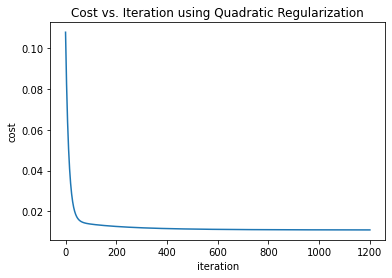

In [ ]:
plt.plot(cost_quad)
plt.title('Cost vs. Iteration using Quadratic Regularization')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 1.2.2 Loss on test set

In [ ]:
def square_loss(X, y, theta):
  part = y - np.dot(X,theta)
  loss = np.dot(part.T,part)
  return loss.item()

In [ ]:
square_loss(X_test, y_test, theta_quad)

0.2969025241080075

# **1.3 Gradient descent with lasso regularization**


---




In [ ]:
# Parameters for Lasso Regularization
lambda_ = 1

In [ ]:
# Loss function J
def lossLasso(X, y, theta, la):
  """
    X: [ones X_train]
    y: y_train
  """
  part = y - np.dot(X, theta)
  J = 1/(2*m)*np.dot(part.T, part) + la/(2*m)*np.sum(abs(theta))
  return J.item()

## 1.3.1 The gradient descent algorithm is given by: 
> $\frac{\partial J(\theta)}{\partial \theta_j} = \begin{cases} \frac{1}{m}\sum^m_{i=1}(y^i - h_{\theta}(x^i))x_j^i + \frac{\lambda}{2m} \mbox{  if }\theta_j\equiv 0 \\ \frac{1}{m}\sum^m_{i=1}(y^i - h_{\theta}(x^i))x_j^i + \frac{\lambda}{2m}\frac{\theta_j}{|\theta_j|} \mbox{ otherwise}\end{cases}$

In [ ]:
# The gradient descent
def gradientDescentLasso(X, y, lr, ep, la):
  m, n = X.shape[0], X.shape[1]
  theta = np.zeros((n,1))
  new_theta = np.zeros(theta.shape)
  costHistory = []
  costHistory.append(loss(X, y, theta, la))
  k = 0
  while True:
    h = np.dot(X,theta)-y
    for j in range(n):
      if theta[j] == 0.0: 
        grad = 1/m*np.dot(h.T,X[:,j]) + la/(2*m)
      else:
        grad = 1/m*np.dot(h.T,X[:,j]) + la/(2*m) * theta[j] / abs(theta[j])
      new_theta[j] = theta[j] - lr*grad
    theta = new_theta
    costHistory.append(lossLasso(X, y, theta, la))
    k = k+1
    # convergence criterion
    if abs(costHistory[k-1]-costHistory[k])*100/costHistory[k-1] < ep:
      break
  return costHistory, theta

In [ ]:
cost_lass, theta_lass = gradientDescentLasso(X_train, y_train, alpha, epsilon, lambda_)
theta_lass

array([[ 1.58483506e-01],
       [ 1.14673013e-01],
       [-5.43007446e-05],
       [ 7.26682662e-02],
       [ 2.25653242e-02],
       [ 1.24056458e-01],
       [-9.57782501e-05],
       [-1.48834679e-05],
       [ 5.83784378e-02],
       [ 1.11700455e-01],
       [-7.25575414e-05],
       [ 6.35071783e-02],
       [-9.39854852e-05],
       [ 1.10586666e-04],
       [ 8.01600707e-02],
       [ 6.79182596e-02]])

## 1.3.2 Plot the value of loss function J(theta) vs. the number iteration

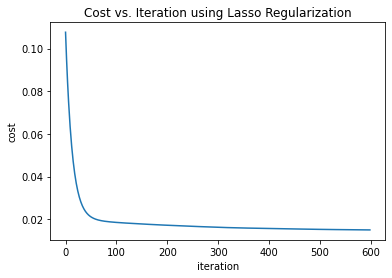

In [ ]:
plt.plot(cost_lass)
plt.title('Cost vs. Iteration using Lasso Regularization')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 1.3.3 Loss on test set

In [ ]:
square_loss(X_test, y_test, theta_lass)

0.3110495260273877

# **1.4 Comparing quadratic and lasso regularization**

---



In [ ]:
def zerosCount(theta, val=0.01):
  count = np.count_nonzero(abs(theta) < val) #Counting True (nonzero) 
  return count

In [ ]:
zerosCount(theta_quad), zerosCount(theta_lass)

(3, 6)

The lasso regularization have more zeros (6) than the quadratic regularization (3)